# 05.1 - Instinctly understanding Frequency domain analysis via acoustic exploration

Time series analysis is a rich field, envolving extensive mathematical analysis. Since our time is limited, we will try to learn the importance of time series analysis with an intuitive acoustic example.

Sound waves are used so we can identify frequency components in a way other than graphical. The 440 Hz note corresponds to the [pitch used as the de facto musical reference for tunning](https://en.wikipedia.org/wiki/A440_(pitch_standard)).

When we record something we are __sampling it__. If our recording apparatus is working properly, it acquires information at a steady and uniform rate. The rate at which we sample something is called the __Sampling Rate__.

44000

To define a monochromatic signal (a one-frequency signal), of course, the __frequency (f)__ itself, and the __amplitude (A)__ of the signal. We also need a __phase ($\phi$)__ that gives the delay of the wave. At the instant of time __t__ our wave looks like:

$$w(t) = A\sin(2\pi~f~t + \phi)$$

To measure a signal (a wave in this case) is to __sample it__. To properly define programatically via python a reproducible sound, we need to define a sample rate and also the time which we want our signal to play.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed
from IPython.display import display
import IPython.display as ipd

def wave_plot(amplitude=1.0, frequency=1.0, phase=0):
    t = np.linspace(0, 5, 1000)
    y = amplitude * np.sin(2.0*np.pi*frequency*t + phase)
    
    fig, ax = plt.subplots(figsize=(12,5))
    ax.plot(t, y)
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Amplitude [A.U]")
    ax.set_xlim(0, 5)
    ax.set_ylim(-3, 3)
    plt.tight_layout()
    plt.show()

ModuleNotFoundError: No module named 'ipywidgets'

In [3]:
interact(wave_plot,
         amplitude=widgets.FloatSlider(value=1.0, min=0.0, max=3.0, step=0.1),
         frequency=widgets.FloatSlider(value=1.0, min=0.0, max=10.0, step=0.1),
         phase=widgets.FloatSlider(value=0.0, min=-20.0*np.pi, max=20.0*np.pi, step=1.0))

interactive(children=(FloatSlider(value=1.0, description='amplitude', max=3.0), FloatSlider(value=1.0, descrip…

<function __main__.wave_plot(amplitude=1.0, frequency=1.0, phase=0)>

---
## Acoustic examples

In [4]:
sr = 44000.0 # Sample Rate, typical mp3 value. How many samples per second we are measuring
T = 2.0      # Seconds of play
t = np.linspace(0, T, int(T*sr), endpoint=False) # time: the number of points is defined by the length of the time interval and the sampling rate.

In [5]:
freq1 = 440
wave1 = 0.5 * np.sin(2 * np.pi * freq1 * t)

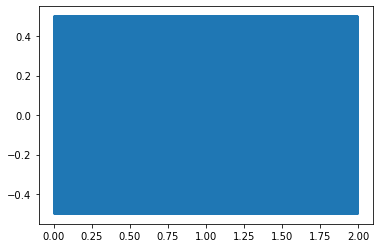

In [6]:
plt.plot(t, wave1)
#plt.xlim(0, 0.01)
plt.show()

In [7]:
ipd.Audio(wave1, rate=sr) # Convert a numpy array into a audio format

In [8]:
freq2 = 880
wave2 = 0.5 * np.sin(2 * np.pi * freq2 * t)  
ipd.Audio(wave2, rate=sr) # load a NumPy array

In [9]:
freq3 = 50 #50Hz is the frequency of AC electricity in Europe 
wave3 = 0.5 * np.sin(2 * np.pi * freq3 * t)
ipd.Audio(wave3, rate=sr) # load a NumPy array

In [23]:
freq4 = 18000
wave4 = 2 * np.sin(2.0 * np.pi * freq4 * t)
ipd.Audio(wave4, rate=sr) # load a NumPy array

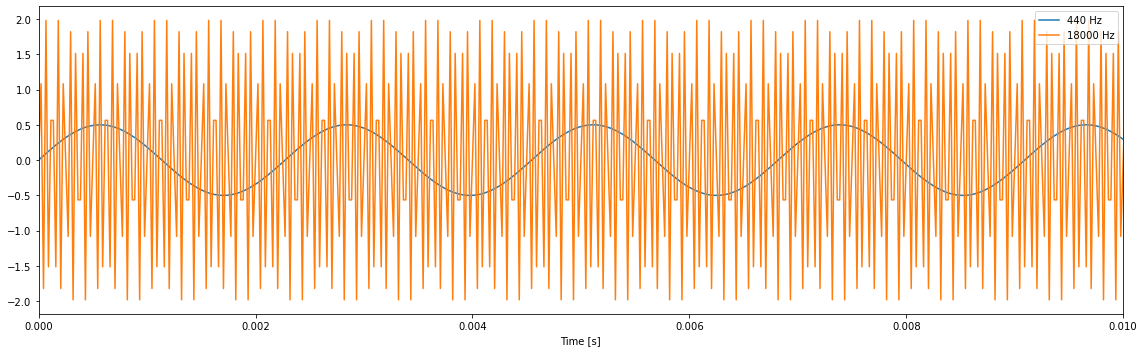

In [24]:
fig, ax = plt.subplots(figsize=(16,5))

ax.plot(t, wave1, label=f'{freq1} Hz')

ax.plot(t, wave4, label=f'{freq4} Hz')

ax.set_xlim(0, 0.01)
ax.set_xlabel('Time [s]')

plt.legend()
plt.tight_layout()
plt.show()

The "spikes" in the orange plot mean that the rate of change of that signal is too fast for my sampling rate to track it in a smooth way. 

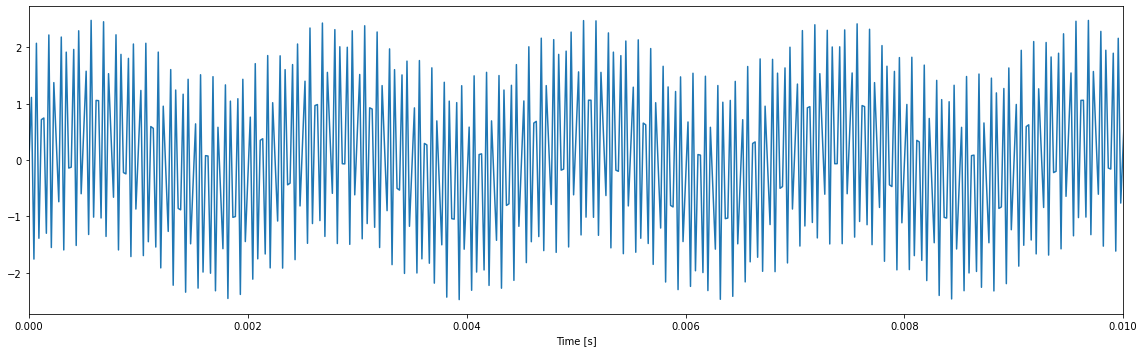

In [25]:
fig, ax = plt.subplots(figsize=(16,5))

ax.plot(t, wave1 + wave4)

ax.set_xlim(0, 0.01)

ax.set_xlabel("Time [s]")
plt.tight_layout()
plt.show()

In [17]:
ipd.Audio(wave1+wave3, rate=sr) # Change to other mixes so you can get a feel

The __Fourier Transform__ moves you from the normal mathematical space, or __normal domain__, which is __Time__ in our example, into the conjugate mathematical space, or __conjugate domain__. The conjugate domain of Time is Frequency.

The Fourier Transform itself is a heavy algorithm to compute. For many years it was impossible for computers to do it. Since the 1800s there has been research in how to simplify the computation needed to perform the Transformation. In the 60s, a very close and easily computable alternative is introduced, the __Fast Fourier Transform (FFT)__. Please note, it is not the exact Fourier Transform itself. It can mathematically demonstrated that the FFT is a very good approximation.

As we are analysing only signals with real components, we need to get the real components of the transform. The Real FFT gives you the amplitude characteristics of your signals.

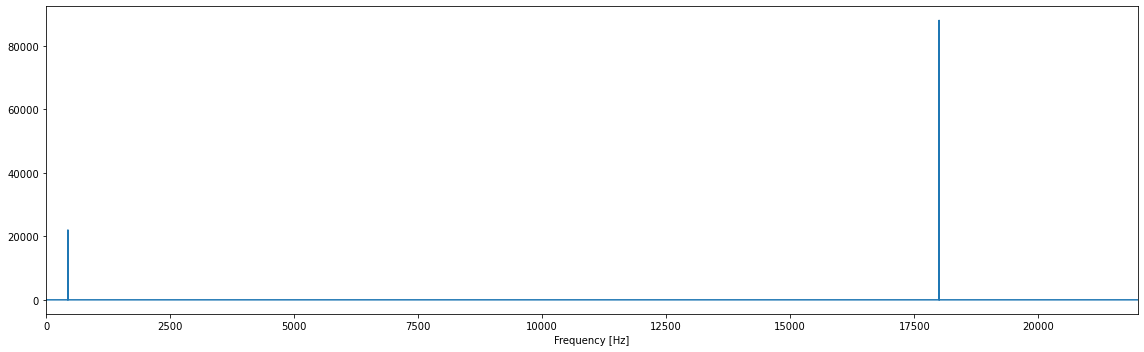

In [26]:
fig, ax = plt.subplots(figsize=(16,5))

real_fft = np.abs(np.fft.rfft(wave1+wave4))
frequencies = np.linspace(0, sr/2, num= int(sr/2*T) + 1, endpoint=False)

ax.plot(frequencies, real_fft)

ax.set_xlabel("Frequency [Hz]")

ax.set_xlim(0, sr/2)
#ax.set_xlim(400, 500)
#ax.set_xlim(17000, 19000)

plt.tight_layout()
plt.show()

In [ ]:
44000 - 22000Hz

There are some limitations to apply the FFT. All your data points must be equally spaced and your total data points must be a power of 2 (256, 512, 1024, etc...). There are easy ways to overcome this.

Also of note, if you have a sample rate __sr__, you can only measure frequencies up to __sr/2__, as explained by the [Nyquist-Shannon theorem](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem).

With a sampling rate of 44000 Hz in our audio example, we can only accurately measure frequencies of up to 22000 Hz.

<div class="alert alert-info">
    <br>
    <b>Exercise: Change the amplitude of the sine waves and run the FFT algorithm. What happens to the peaks you see?</b>      
    <br>
    <br>
</div>

---

## Why this matters for a business

Some trends could be understood with a simple Fourier analysis. Let's use real data examples.
[Moving forwards into the next notebbok](05.2-TrendsSmoothingFiltering.ipynb).